In [ ]:
#ANALIZA DANYCH W R I PYTHON
#ZAROBKI ZAWODNIKOW NBA W ZALEZNOSCI OD ICH SKUTECZNOSCI ORAZ POPULARNOSCI

In [1]:
#PAKIETY

#1.1 INSTALACJA PAKIETOW
#!pip install pandas
#!pip install matplotlib
#%pip install seaborn
#%pip install openpyxl
#%pip install scikit-learn

#1.2 IMPORT PAKIETOW
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from math import pi
import numpy as np

In [17]:
#DANE

#2.1 WCZYTANIE DANYCH
data = pd.read_excel('data_NBA.xlsx')

#2.2 SŁOWNIK ZMIENNYCH
opis_kolumn = {
    "Zawodnik": "Imie i nazwisko koszykarza",
    "Zespół": "Skrót nazwy drużyny (np. GSW - Golden State Warriors)",
    "Wiek": "Wiek zawodnika (w latach)",
    "Mecze": "Liczba rozegranych spotkań w sezonie",
    "Wygrane": "Liczba wygranych meczów",
    "Przegrane": "Liczba przegranych meczów",
    "Minuty_srednio": "Średnia liczba minut spędzanych na parkiecie w meczu",
    "Punkty_srednio": "Średnia liczba zdobywanych punktów na mecz",
    "Celnerzuty_srednio": "Średnia liczba celnych rzutów z gry na mecz",
    "Rzuty_srednio": "Średnia liczba wszystkich oddanych rzutów na mecz",
    "Skuteczność_proc": "Procentowa skuteczność rzutów z gry",
    "Zbiorki_srednia": "Średnia liczba zbiórek na mecz",
    "Asysty_srednio": "Średnia liczba asyst (podań kończących się punktem) na mecz",
    "Straty_srednio": "Średnia liczba strat piłki na mecz",
    "Przechwyty_srednia": "Średnia liczba przejęć piłki od przeciwnika na mecz",
    "Blok_srednia": "Średnia liczba zablokowanych rzutów rywala na mecz",
    "Faul_srednio": "Średnia liczba fauli popełnianych na mecz",
    "Salary": "Roczne wynagrodzenie zawodnika w dolarach (USD)",
    "Pozycja": "Pozycja na boisku (Obrońca, Skrzydłowy, Środkowy)",
    "Obserwujacy_ln": "Wskaźnik popularności (liczba obserwujących w mln na Instagramie)"
}

print("\n Słownik zmiennych (Opis kolumn):")
print("-" * 60)
print(f"{'ZMIENNA':<25} | {'OPIS'}")
print("-" * 60)

for kolumna, opis in opis_kolumn.items():
    print(f"{kolumna:<25} | {opis}")

#2.3 WYMIAR DANYCH
print(f"\nWymiary zbioru danych: {data.shape}")

#2.4 WERYFIKACJA BRAKOW
print("\nLaczna liczba brakow danych:")
print(data.isnull().sum().sum())

#2.5 TYP DANYCH
print("\nTypy danych w kolumnach:")
print(data.dtypes)

#2.6 STRUKTURA DANYCH
print("\nPierwsze 5 wierszy danych:")
print(data.head())

#2.7 STATYSTYKI OPISOWE
print("\nStatystyki opisowe:")
print(data.describe().round(2))





 Słownik zmiennych (Opis kolumn):
------------------------------------------------------------
ZMIENNA                   | OPIS
------------------------------------------------------------
Zawodnik                  | Imie i nazwisko koszykarza
Zespół                    | Skrót nazwy drużyny (np. GSW - Golden State Warriors)
Wiek                      | Wiek zawodnika (w latach)
Mecze                     | Liczba rozegranych spotkań w sezonie
Wygrane                   | Liczba wygranych meczów
Przegrane                 | Liczba przegranych meczów
Minuty_srednio            | Średnia liczba minut spędzanych na parkiecie w meczu
Punkty_srednio            | Średnia liczba zdobywanych punktów na mecz
Celnerzuty_srednio        | Średnia liczba celnych rzutów z gry na mecz
Rzuty_srednio             | Średnia liczba wszystkich oddanych rzutów na mecz
Skuteczność_proc          | Procentowa skuteczność rzutów z gry
Zbiorki_srednia           | Średnia liczba zbiórek na mecz
Asysty_srednio         

In [24]:
#PRZEKSZTALCANIE DANYCH

#3.1 ZAMIANA DANYCH NA LICZBOWE 
data_liczbowe = data.columns.difference(['Zawodnik', 'Zespół', 'Pozycja', 'Obserwujacy_mln'])
data[data_liczbowe] = data[data_liczbowe].apply(pd.to_numeric, errors='coerce')

#3.2 ZAMIANA DANYCH W KOLUMIE Z OBSERWUJACYMI I ZAMIANA NA WARTOSCI NUMERYCZNE
data['Obserwujacy_mln'] = data['Obserwujacy_mln'].replace('<1', 0.5)
data['Obserwujacy_mln'] = pd.to_numeric(data['Obserwujacy_mln'], errors='coerce')

#3.3 TYP DANYCH PO ZMIANIE
print("\nTypy danych po zmianie:")
print(data.dtypes)

#3.4 ANALIZA TOP 3 ZAWODNIKÓW W RÓŻNYCH KATEGORIACH
print("\nTOP 3 - Największe zarobki (Salary):")
top_salary = data.nlargest(3, 'Salary')[['Zawodnik', 'Salary']]
print(top_salary)

print("\nTOP 3 - Najwięcej obserwujących:")
# Upewnij się, że nazwa kolumny jest zgodna z Twoją (Obserwujacy_mln lub Obserwujacy_ln)
top_followers = data.nlargest(3, 'Obserwujacy_mln')[['Zawodnik', 'Obserwujacy_mln']]
print(top_followers)

print("\nTOP 3 - Najwięcej punktów średnio:")
top_points = data.nlargest(3, 'Punkty_srednio')[['Zawodnik', 'Punkty_srednio']]
print(top_points)

print("\nTOP 3 - Najwięcej minut na boisku:")
top_minutes = data.nlargest(3, 'Minuty_srednio')[['Zawodnik', 'Minuty_srednio']]
print(top_minutes)

print("\nTOP 3 - Najlepsza skuteczność (%):")
top_efficiency = data.nlargest(3, 'Skuteczność_proc')[['Zawodnik', 'Skuteczność_proc']]
print(top_efficiency)

print("\nTOP 3 - Najlepsi obrońcy (Bloki + Przechwyty):")
# Tworzymy tymczasową sumę, by znaleźć najlepszych
data['Obrona_Suma'] = data['Blok_srednia'] + data['Przechwyty_srednia']
top_defense = data.nlargest(3, 'Obrona_Suma')[['Zawodnik', 'Obrona_Suma']]
print(top_defense)




Typy danych po zmianie:
Zawodnik               object
Zespół                 object
Wiek                    int64
Mecze                   int64
Wygrane                 int64
Przegrane               int64
Minuty_srednio        float64
Punkty_srednio        float64
Celnerzuty_srednio    float64
Rzuty_srednio         float64
Skuteczność_proc      float64
Zbiorki_srednia       float64
Asysty_srednio        float64
Straty_srednio        float64
Przechwyty_srednia    float64
Blok_srednia          float64
Faul_srednio          float64
Salary                  int64
Pozycja                object
Obserwujacy_mln       float64
Obrona_Suma           float64
dtype: object

TOP 3 - Największe zarobki (Salary):
        Zawodnik    Salary
0  Stephen Curry  55761216
1   Nikola Jokic  51415938
2    Joel Embiid  51415938

TOP 3 - Najwięcej obserwujących:
              Zawodnik  Obserwujacy_mln
13        LeBron James           159.70
0        Stephen Curry            58.40
283  Russell Westbrook         


Największe zarobki (Salary):
        Zawodnik    Salary
0  Stephen Curry  55761216
1   Nikola Jokic  51415938
2    Joel Embiid  51415938

Najwięcej obserwujących:
              Zawodnik  Obserwujacy_mln
13        LeBron James           159.70
0        Stephen Curry            58.40
283  Russell Westbrook            22.60

Najwięcej punktów średnio:
                   Zawodnik  Punkty_srednio
32  Shai Gilgeous-Alexander           32.70
11    Giannis Antetokounmpo           30.40
1              Nikola Jokic           29.60

Najwięcej minut na boisku:
        Zawodnik  Minuty_srednio
35  Tyrese Maxey           37.70
93     Josh Hart           37.60
6   Devin Booker           37.30

Najlepsza skuteczność (%):
          Zawodnik  Skuteczność_proc
336      Kai Jones             79.80
322   Jaxson Hayes             72.20
84   Jarrett Allen             70.60

Najlepsi obrońcy (Bloki + Przechwyty):
              Zawodnik  Obrona_Suma
126  Victor Wembanyama         4.90
219      Dyson Daniels  

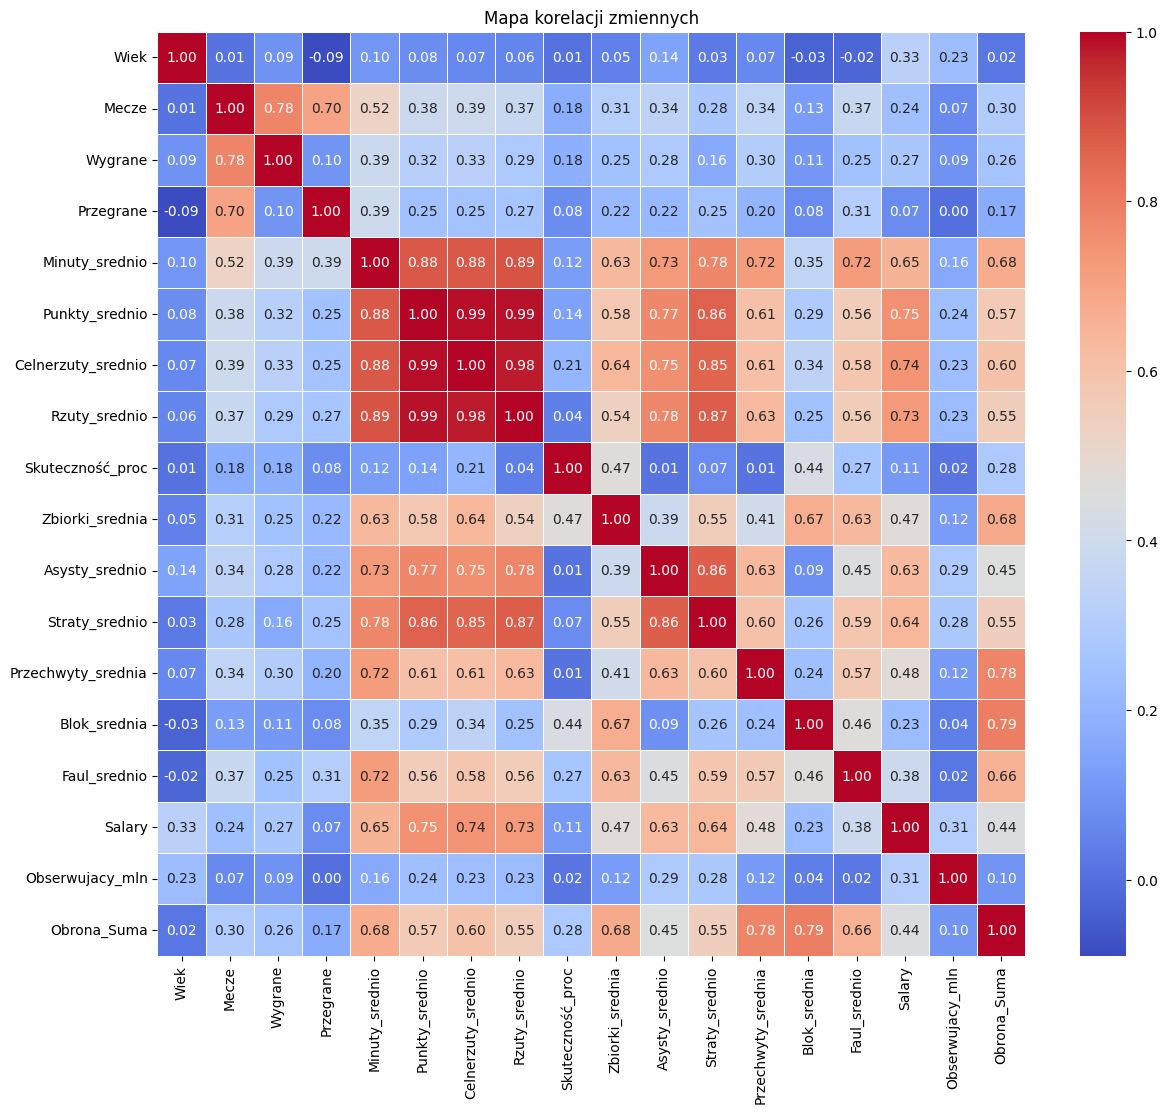

In [33]:
#ANALIZA DANYCH

#4.1 ANALIZA TOP 3 ZAWODNIKÓW W RÓŻNYCH KATEGORIACH
print("\nNajwiększe zarobki (Salary):")
top_salary = data.nlargest(3, 'Salary')[['Zawodnik', 'Salary']]
print(top_salary)

print("\nNajwięcej obserwujących:")
top_followers = data.nlargest(3, 'Obserwujacy_mln')[['Zawodnik', 'Obserwujacy_mln']]
print(top_followers)

print("\nNajwięcej punktów średnio:")
top_points = data.nlargest(3, 'Punkty_srednio')[['Zawodnik', 'Punkty_srednio']]
print(top_points)

print("\nNajwięcej minut na boisku:")
top_minutes = data.nlargest(3, 'Minuty_srednio')[['Zawodnik', 'Minuty_srednio']]
print(top_minutes)

print("\nNajlepsza skuteczność (%):")
top_efficiency = data.nlargest(3, 'Skuteczność_proc')[['Zawodnik', 'Skuteczność_proc']]
print(top_efficiency)

print("\nNajlepsi obrońcy (Bloki + Przechwyty):")
# Tworzymy tymczasową sumę, by znaleźć najlepszych
data['Obrona_Suma'] = data['Blok_srednia'] + data['Przechwyty_srednia']
top_defense = data.nlargest(3, 'Obrona_Suma')[['Zawodnik', 'Obrona_Suma']]
print(top_defense)

#4.2 ANALIZA KORELACJI (PEARSONA) POMIEDZY ZMIENNYMI

#KORELACAJ POMIEDZY WSZYSTKIMI ZMIENNYMI NUMERYCZNYMI
corr = data.select_dtypes(include=['number']).corr()

#KORELACJA POMIEDZY WYBRANYMI ZMIENNYMI
wybrane_zmienne = ['Wiek', 'Wygrane', 'Przegrane', 'Punkty_srednio', 
                   'Asysty_srednio', 'Przechwyty_srednia', 'Salary', 'Obserwujacy_mln']

subset = data[wybrane_zmienne]
corr_subset = subset.corr()

pairs = corr_subset.unstack().sort_values(ascending=False)
top_5 = pairs[pairs < 1.0].iloc[::2].head(5)

print("\nNajsielniejsza korelacja pomiedzy zmiennymi:")
print(top_5)

# WYKRES
plt.figure(figsize=(14, 12))  # Ustawiamy duży rozmiar, żeby wszystko było czytelne
sns.heatmap(corr, 
            annot=True,       # Wpisz wartości liczbowe w kwadraty
            cmap='coolwarm',  # Kolorystyka: czerwony (gorący) = wysoka korelacja, niebieski = niska
            fmt=".2f",        # Formatowanie liczb (2 miejsca po przecinku)
            linewidths=0.5)   # Białe linie oddzielające kwadraty

plt.title('Mapa korelacji zmiennych')
plt.show()

#ZROBIC DALEJ: WIEK W KTORYM NAJWIECEJ ZARABIAJA, SREDNIA WYNAGRODZENIA W ZALEZNOSCI OD ZESPOLU (POROWNAC Z LICZBA PUNKTOW ZESPOLU W SEZONIE), DOLOZYC INFO O NAJLEPSZYCH PUNKTACH, ASYSTACH, OBRONCZACH I ICH ZAROBKACH
#POZNIEJ WIZUALIAZCJA


In [5]:
### PROJEKT ANALIZA DANYCH W R I PYTHON

#INSTALACJA PAKIETOW
#!pip install pandas
#!pip install matplotlib
#%pip install seaborn
#%pip install openpyxl
#%pip install scikit-learn

# ZALADOWANIE PAKIETOW
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from math import pi
import numpy as np

# ZALADOWANIE DANYCH
# Upewnij się, że plik 'NBA - stats.xlsx' jest w tym samym folderze!
df = pd.read_excel('NBA - stats.xlsx')


In [10]:
#1 STRUKTURA DANYCH
#1.1 PIERWSZE 5 WIERSZY
print("\n### 1.1 Pierwsze 5 wierszy danych:")
print(df.head())

#1.2 SPRAWDZENIE BRAKUJACYCH WARTOSCI
print("\n### 1.2 Liczba brakujących wartości w każdej kolumnie:")
print(df.isnull().sum())

#1.3 Zaiana nazwy kolumny
df.rename(columns={'Unnamed: 30': 'Position'}, inplace=True)

# 1.4 Ustawienie numercznych kolumn
# Dodano 'AST' i 'REB' do konwersji, aby móc później obliczyć korelacje.
for col in ['Salary', 'Age', 'PTS', 'AST', 'REB']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Używamy wszystkich potrzebnych kolumn do czyszczenia, aby nie było problemu z korelacja
df_clean = df.dropna(subset=['Salary', 'Age', 'PTS', 'AST', 'REB'])


### 1.1 Pierwsze 5 wierszy danych:
          Player Team  Age  GP   W   L   Min   PTS   FGM   FGA  ...  TOV  STL  \
0  Stephen Curry  GSW   37  70  41  29  32.2  24.5   8.1  18.0  ...  2.9  1.1   
1   Nikola Jokic  DEN   30  70  46  24  36.7  29.6  11.2  19.5  ...  3.3  1.8   
2    Joel Embiid  PHI   31  19   8  11  30.2  23.8   7.4  16.6  ...  3.3  0.7   
3   Kevin Durant  PHX   36  62  33  29  36.5  26.6   9.5  18.1  ...  3.1  0.8   
4   Bradley Beal  PHX   32  53  22  31  32.1  17.0   6.5  13.1  ...  1.9  1.1   

   BLK   PF    FP  DD2  TD3  +/-    Salary  Unnamed: 30  
0  0.4  1.4  40.7    9    0  4.3  55761216            G  
1  0.6  2.3  64.3   59   34  8.5  51415938            C  
2  0.9  2.2  42.1    7    1 -3.0  51415938            C  
3  1.2  1.7  43.2    5    0 -0.6  51179021            F  
4  0.5  2.6  29.5    1    0 -5.2  50203930            G  

[5 rows x 31 columns]

### 1.2 Liczba brakujących wartości w każdej kolumnie:
Player         0
Team           0
Age            0

In [14]:
# 2.1 STATYSTYKA OPISOWA
print("\n--- Podstawowe statystyki opisowe ---")

# 2.1.1 Zmiana opcji wyświetlania dla Pandas, aby wyłączyć notację wykładniczą
pd.options.display.float_format = '{:,.2f}'.format

# 2.1.2 Obliczenie statystyk i transpozycja dla lepszej czytelności
# Używamy df.describe() na oryginalnym DataFrame (przed czyszczeniem)
desc_stats_transposed = df.describe().T

# 2.1.3. Wyświetlenie ulepszonej, transponowanej tabeli
print(desc_stats_transposed)

#2.1.4. Przywrócenie oryginalnego formatowania
pd.reset_option('display.float_format') 


df_clean = df.dropna(subset=['Salary', 'Age', 'PTS'])

# 2.2 NAJSTARSZY ORAZ NAJMLODSZY GRACZ
oldest_player = df_clean.loc[df_clean['Age'].idxmax(), ['Player', 'Age']]
youngest_player = df_clean.loc[df_clean['Age'].idxmin(), ['Player', 'Age']]

# 2.3 NAJWIEKSZA I NAJMNIEJSZA PENSJA
max_salary_player = df_clean.loc[df_clean['Salary'].idxmax(), ['Player', 'Salary']]
min_salary_player = df_clean.loc[df_clean['Salary'].idxmin(), ['Player', 'Salary']]

# 2.4 GRACZ Z NAJWIEKSZA LICZBA PUNKTOW
max_pts_player = df_clean.loc[df_clean['PTS'].idxmax(), ['Player', 'PTS']]

# 2.5 Średnia dla wynagrodzenia, wieku, liczby punktow
avg_salary = df_clean['Salary'].mean()
avg_age = df_clean['Age'].mean()
avg_pts = df_clean['PTS'].mean()

# 2.6 SREDNIA WYNAGRODZENIA W ZALEZNOSCI OD ZESPOLU
team_avg_salary = df_clean.groupby('Team')['Salary'].mean().sort_values(ascending=False)

# 2.7 WIEK NAJWIEKSZEGO SREDNIEGO WYNAGRODZENIA
age_avg_salary = df_clean.groupby('Age')['Salary'].mean()
max_avg_salary_age = age_avg_salary.idxmax()
max_avg_salary_value = age_avg_salary.max()

# 2.8 WYSWIETLANIE
print("\n--- Szczegółowe Statystyki Opisowe ---")

print("\n1. Najstarszy i Najmłodszy Gracz:")
print(f"Najstarszy Gracz: {oldest_player['Player']} ({oldest_player['Age']:.0f} lat)")
print(f"Najmłodszy Gracz: {youngest_player['Player']} ({youngest_player['Age']:.0f} lat)")

print("\n2. Najwyższa i Najniższa Pensja:")
print(f"Najwyższa Pensja: {max_salary_player['Player']} (${max_salary_player['Salary']:,.0f})")
print(f"Najniższa Pensja: {min_salary_player['Player']} (${min_salary_player['Salary']:,.0f})")

print("\n3. Gracz z Największą Liczbą Punktów (PTS):")
print(f"Gracz: {max_pts_player['Player']} ({max_pts_player['PTS']:.1f} PTS)")

print("\n4. Średnie Wartości:")
print(f"Średnie Wynagrodzenie: ${avg_salary:,.0f}")
print(f"Średni Wiek: {avg_age:.2f} lat")
print(f"Średnia Liczba Punktów (PTS): {avg_pts:.2f}")

print("\n5. Średnie Wynagrodzenie w Zależności od Zespołu (Top 5):")
# POPRAWKA: Zastąpienie .to_markdown() przez .to_string(header=False)
print(team_avg_salary.head(5).apply(lambda x: f"${x:,.0f}").to_string(header=False))

print("\n6. Wiek ze Średnio Największym Wynagrodzeniem:")
print(f"Wiek: {max_avg_salary_age:.0f} lat (Średnia Pensja: ${max_avg_salary_value:,.0f})")

# 2.9 ANALIZA KORELACJI
# Obliczenie korelacji między Zarobkami a Wiekiem
corr_age_salary = df_clean['Age'].corr(df_clean['Salary'])
# Obliczenie korelacji między Zarobkami a Punktami (PTS)
corr_pts_salary = df_clean['PTS'].corr(df_clean['Salary'])
# Korelacja między punktami a innymi statystykami
corr_pts_ast = df_clean['PTS'].corr(df_clean['AST'])
corr_pts_reb = df_clean['PTS'].corr(df_clean['REB'])

# 2.10.1 Największa Dyspersja Punktów (PTS) - Międzykwartylowy Zakres (IQR)
Q1_pts = df_clean['PTS'].quantile(0.25)
Q3_pts = df_clean['PTS'].quantile(0.75)
IQR_pts = Q3_pts - Q1_pts

# 2.10.2 Średnia Pensja według Klasy Wieku (np. 19-25, 26-30, 31+)
age_bins = [18, 25, 30, 45]
age_labels = ['Młody (19-25)', 'Szczyt (26-30)', 'Weteran (31+)']
df_clean['Age_Group'] = pd.cut(df_clean['Age'], bins=age_bins, labels=age_labels, right=True)
salary_by_age_group = df_clean.groupby('Age_Group')['Salary'].mean().sort_values(ascending=False)

# 2.11 WYŚWIETLANIE WYNIKÓW KORELACJI I DODATKOWYCH STATYSTYK
print("\n7. Analiza Korelacji")
print(f"7.1 Korelacja Zarobków i Wieku: {corr_age_salary:.3f}")
print(f"7.2 Korelacja Zarobków i Punktów (PTS): {corr_pts_salary:.3f}")
print(f"7.3 Korelacja Punktów (PTS) i Asyst (AST): {corr_pts_ast:.3f}")
print(f"7.4 Korelacja Punktów (PTS) i Zbiórek (REB): {corr_pts_reb:.3f}")

print(f"\n8.Międzykwartylowy Zakres (IQR) dla Punktów (PTS): {IQR_pts:.2f}")
print(f"(Różnica między 75. a 25. percentylem - miara dyspersji)")
print("\n9.Średnia Pensja według Klasy Wieku:")
print(salary_by_age_group.apply(lambda x: f"${x:,.0f}").to_string(header=False))


--- Podstawowe statystyki opisowe ---


NameError: name 'df' is not defined

In [15]:
#3 WIZUALIZACJE 

# --- 2. Wykres 1: Średnia Pensja w Zależności od Zespołu (Bar Chart) ---
team_avg_salary = df_clean.groupby('Team')['Salary'].mean().sort_values(ascending=False)

plt.figure(figsize=(14, 7))
sns.barplot(x=team_avg_salary.index, y=team_avg_salary.values, palette="viridis")
plt.xticks(rotation=75, fontsize=8)
plt.title('Wykres 1: Średnie Wynagrodzenie (USD) w Zależności od Zespołu (Posortowane)', fontsize=14)
plt.xlabel('Zespół NBA')
plt.ylabel('Średnie Wynagrodzenie (USD)')

# Formatowanie osi Y na miliony dolarów
formatter = plt.FuncFormatter(lambda x, pos: f'${x/1e6:,.0f}M')
plt.gca().yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.savefig('wykres_1_pensja_zespol.png')
plt.close()

# --- 3. Wykres 2: Punkty (PTS) w Zależności od Wieku (Scatter Plot z linią trendu) ---
plt.figure(figsize=(10, 6))
# regplot z seaborn automatycznie dodaje linię regresji
sns.regplot(x='Age', y='PTS', data=df_clean, scatter_kws={'alpha':0.6}, line_kws={"color": "red"})
plt.title('Wykres 2: Punkty (PTS) w Zależności od Wieku (z Linią Trendu)', fontsize=14)
plt.xlabel('Wiek (lata)')
plt.ylabel('Punkty na Mecz (PTS)')
plt.tight_layout()
plt.savefig('wykres_2_punkty_wiek.png')
plt.close()

# --- 4. Wykres 3: Pensja (Salary) w Zależności od Punktów (PTS) z Wpływem Wieku (Scatter Plot) ---
plt.figure(figsize=(10, 6))
# Użycie wieku do koloru (hue) i rozmiaru (size) punktu dla dodatkowej informacji
sns.scatterplot(x='PTS', y='Salary', data=df_clean, alpha=0.6, hue='Age', size='Age', sizes=(20, 200), palette='coolwarm')
plt.title('Wykres 3: Pensja (Salary) vs Punkty (PTS) z Wpływem Wieku', fontsize=14)
plt.xlabel('Punkty na Mecz (PTS)')
plt.ylabel('Wynagrodzenie (USD)')

# Formatowanie osi Y na miliony dolarów
formatter = plt.FuncFormatter(lambda x, pos: f'${x/1e6:,.0f}M')
plt.gca().yaxis.set_major_formatter(formatter)

plt.legend(title='Wiek', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('wykres_3_pensja_punkty.png')
plt.close()

# --- 5. Wykres 4 (Ciekawy): Średnie Wynagrodzenie w Zależności od Wieku (Line Plot) ---
age_avg_salary = df_clean.groupby('Age')['Salary'].mean()

plt.figure(figsize=(10, 6))
sns.lineplot(x=age_avg_salary.index, y=age_avg_salary.values, marker='o', color='darkred')
plt.title('Wykres 4: Średnie Wynagrodzenie (USD) a Wiek Gracza', fontsize=14)
plt.xlabel('Wiek (lata)')
plt.ylabel('Średnie Wynagrodzenie (USD)')
# Ustawienie etykiet X co 2 lata dla czytelności
plt.xticks(np.arange(df_clean['Age'].min(), df_clean['Age'].max()+1, 2))

# Formatowanie osi Y na miliony dolarów
formatter = plt.FuncFormatter(lambda x, pos: f'${x/1e6:,.0f}M')
plt.gca().yaxis.set_major_formatter(formatter)

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('wykres_4_srednia_pensja_wiek.png')
plt.close()

# Wybór graczy do porównania
players_to_compare = ['Stephen Curry', 'Nikola Jokic', 'Giannis Antetokounmpo']
stats_cols = ['PTS', 'AST', 'REB', 'STL', 'BLK', '3PM']
categories = stats_cols

# Normalizacja Danych (Min-Max Scaling)
# Znormalizujemy dane na skali od 0 do 1 względem całego zbioru danych.
df_normalized = df_clean.copy()
for col in stats_cols:
    min_val = df_normalized[col].min()
    max_val = df_normalized[col].max()
    # Wzór normalizacji: (wartość - min) / (max - min)
    df_normalized[col] = (df_normalized[col] - min_val) / (max_val - min_val)

# Dane dla wykresu radarowego (tylko wybrani gracze z znormalizowanymi statystykami)
radar_data = df_normalized[df_normalized['Player'].isin(players_to_compare)][['Player'] + stats_cols].set_index('Player')

if radar_data.empty:
    print(f"BŁĄD: Nie znaleziono graczy ({players_to_compare}) do porównania. Sprawdź, czy ich nazwy są poprawne w pliku.")
    exit()

# --- 3. Generowanie Wykresu Radarowego ---

def create_radar_chart(df_data, categories, title):
    """Tworzy i zapisuje wykres radarowy."""
    
    N = len(categories)
    
    # Tworzenie kątów dla każdej osi
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1] # Zamknięcie koła
    
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    
    # Ustawienie orientacji osi
    ax.set_theta_offset(pi / 2) # Pierwsza oś na górze
    ax.set_theta_direction(-1) # Kierunek rysowania zgodny z ruchem wskazówek zegara
    
    # Etykiety na obwodzie
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, fontsize=12, weight='bold')
    
    # Etykiety dla osi promieniowej (wartości od 0 do 1)
    ax.set_yticks(np.arange(0, 1.1, 0.2))
    ax.set_yticklabels([f"{val:.1f}" for val in np.arange(0, 1.1, 0.2)], color="grey", size=10)
    ax.set_ylim(0, 1)
    
    # Rysowanie poligonów
    for i, player in enumerate(df_data.index):
        values = df_data.loc[player].values.flatten().tolist()
        values += values[:1] # Zamknięcie poligonu
        
        # Kolory dla wybranych graczy (opcjonalne, ale dodaje czytelności)
        color_map = {'Stephen Curry': 'gold', 'Nikola Jokic': 'blue', 'Giannis Antetokounmpo': 'green'}
        color = color_map.get(player, f'C{i}')

        ax.plot(angles, values, linewidth=2, linestyle='solid', label=player, color=color)
        ax.fill(angles, values, color=color, alpha=0.25)
        
    ax.set_title(title, y=1.1, fontsize=16)
    ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1), fontsize=10)
    
    plt.savefig('wykres_radarowy_gwiazdy_nba.png')
    plt.close()

# Wywołanie funkcji
create_radar_chart(radar_data, categories, 'Wykres Radarowy: Porównanie Statystyk Gwiazd NBA (Znormalizowane)')
print("Wygenerowano wykres radarowy: wykres_radarowy_gwiazdy_nba.png.")

#DO POPRWAY WIZUALIZACJE + DODANIE DO STATYSTYKI OPISOWEJ

C:\Users\lab812-02\AppData\Local\Temp\1\ipykernel_13912\622183728.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=team_avg_salary.index, y=team_avg_salary.values, palette="viridis")


Wygenerowano wykres radarowy: wykres_radarowy_gwiazdy_nba.png.
